In [ ]:
from typing import TypedDict,List
from langgraph.graph import StateGraph, START,END

class AgentState(TypedDict):
    number1 : int
    number2: int
    operation :str
    result:int


def addition(state:AgentState)->AgentState:
    """Adds 2 numbers"""
    state["result"]=state["number1"]+state["number2"]
    return state

def subtraction(state:AgentState)->AgentState:
    """Adds 2 numbers"""
    state["result"]=state["number1"]-state["number2"]
    return state

def choose_nextNode(state:AgentState)->AgentState:
    """Select the next node of the graph"""
    if state["operation"] == "+":
        return "add"
    else:
        return "sub"
    
graph=StateGraph(AgentState)
graph.add_node("adder",addition)
graph.add_node("subrator",subtraction)
graph.add_node("router",lambda state:state)

graph.add_edge(START,"router")
graph.add_conditional_edges(
    "router",
    choose_nextNode,
    {
        "add":"adder",
        "sub":"subrator"
    }
    )
graph.add_edge("adder",END)
graph.add_edge("subrator",END)
app=graph.compile()


In [11]:
initial_State=AgentState(number1=10, number2=5,operation="-")
print(app.invoke(initial_State))

{'number1': 10, 'number2': 5, 'operation': '-', 'result': 5}


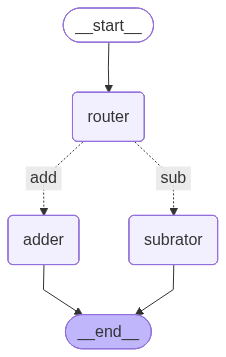

In [9]:
from IPython.display import Image,display
display(Image(app.get_graph().draw_mermaid_png()))